**KVALITETA VINA**

U ovoj *Jupyter* bilježnici ispitivat će se **kvaliteta bijelog vina** i njegova povezanost sa postotkom alkohola u njemu i tzv. *rezidualnim* šećerom (šećer koji ostaje nakon procesa fermentacije).

In [30]:
import pandas as pd
import scipy as sc
from scipy import stats
import numpy as np
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
import sympy as sy
from IPython.display import Image
Image(url='https://253qv1sx4ey389p9wtpp9sj0-wpengine.netdna-ssl.com/wp-content/uploads/2011/03/white-wine-basics-700x461.jpg')

Podaci o kvaliteti vina su skinuti sa stranice https://www.kaggle.com.

In [31]:
data=pd.read_csv('wineQualityWhites.csv', delimiter=',')
data.head()



,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Nakon uspješnog učitavanja podataka, slijedi *pročišćivanje* nepotrebnih stupaca. Valja napomenuti da je rezidualni šećer izražen u gramima po litri, a neke objektivne granice su od 1 gm/L do 45 gm/L.
Postotak alkohola u vinu je izražen u postotku od volumena vina. Kvaliteta vina je dobivena kao srednja vrijednost triju ocjena nezavisnih sudaca.

In [32]:
data.columns

Index(['Unnamed: 0', 'fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [33]:
data[['alcohol','residual.sugar','quality']]

,alcohol,residual.sugar,quality
0,8.800000,20.70,6
1,9.500000,1.60,6
2,10.100000,6.90,6
3,9.900000,8.50,6
4,9.900000,8.50,6
5,10.100000,6.90,6
6,9.600000,7.00,6
7,8.800000,20.70,6
8,9.500000,1.60,6
9,11.000000,1.50,6


In [34]:
data=data[['alcohol','residual.sugar','quality']]
data.head()

,alcohol,residual.sugar,quality
0,8.8,20.7,6
1,9.5,1.6,6
2,10.1,6.9,6
3,9.9,8.5,6
4,9.9,8.5,6


Slijedi transformacija podataka u numpy polje radi lakšeg daljnjeg računanja. Još ćemo i logaritmirati ocjene kvalitete vina u pokušaju postizanja normalnosti uzorka.

In [35]:
alk=np.asarray(data.alcohol)
kval=np.asarray(data.quality)
data.columns = ['alcohol', 'sugar', 'quality']
sugar=np.asarray(data.sugar)
logkval=np.log(kval)
data.head()


,alcohol,sugar,quality
0,8.8,20.7,6
1,9.5,1.6,6
2,10.1,6.9,6
3,9.9,8.5,6
4,9.9,8.5,6


**Deskriptivna statistika**

In [36]:
data.describe()

,alcohol,sugar,quality
count,4898.000000,4898.000000,4898.000000
mean,10.514267,6.391415,5.877909
std,1.230621,5.072058,0.885639
min,8.000000,0.600000,3.000000
25%,9.500000,1.700000,5.000000
50%,10.400000,5.200000,6.000000
75%,11.400000,9.900000,6.000000
max,14.200000,65.800000,9.000000


In [37]:
np.mean(logkval), np.std(logkval)

(1.7595887918058353, 0.15388388031424988)

Slijede **histogrami** podataka.

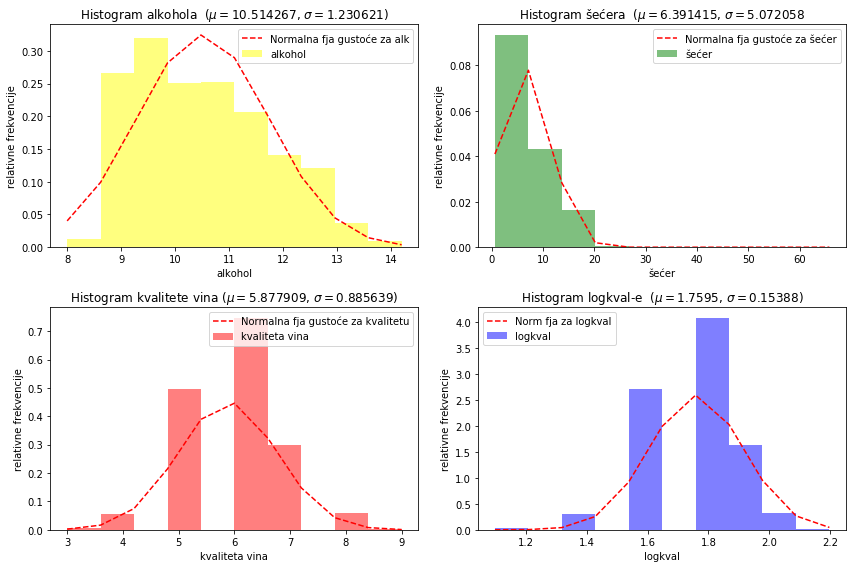

In [38]:
fig, axes = plt.subplots(2,2, figsize=(12, 8))
n, bins, patches = axes[0,0].hist(alk, normed=1, facecolor='yellow', alpha=0.5, label="alkohol")
y = mlab.normpdf(bins, alk.mean(), np.sqrt(alk.var()))
axes[0,0].plot(bins, y, 'r--', label=u'Normalna fja gustoće za alk')
axes[0,0].set_xlabel('alkohol')
axes[0,0].set_ylabel('relativne frekvencije')
axes[0,0].set_title(r'Histogram alkohola  ($\mu=10.514267$, $\sigma=1.230621$)');
n, bins, patches = axes[0,1].hist(sugar, normed=1, facecolor='green', alpha=0.5, label="šećer")
y = mlab.normpdf(bins, sugar.mean(), np.sqrt(sugar.var()))
axes[0,1].plot(bins, y, 'r--', label=u'Normalna fja gustoće za šećer')
axes[0,1].set_xlabel('šećer')
axes[0,1].set_ylabel('relativne frekvencije')
axes[0,1].set_title(r'Histogram šećera  ($\mu=6.391415$, $\sigma=5.072058$');
n, bins, patches = axes[1,0].hist(kval, normed=1, facecolor='red', alpha=0.5, label="kvaliteta vina")
y = mlab.normpdf(bins, kval.mean(), np.sqrt(kval.var()))
axes[1,0].plot(bins, y, 'r--', label=u'Normalna fja gustoće za kvalitetu')
axes[1,0].set_xlabel('kvaliteta vina')
axes[1,0].set_ylabel('relativne frekvencije')
axes[1,0].set_title(r'Histogram kvalitete vina ($\mu=5.877909$, $\sigma=0.885639$)');
n, bins, patches = axes[1,1].hist(logkval, normed=1, facecolor='blue', alpha=0.5, label="logkval")
y = mlab.normpdf(bins, logkval.mean(), np.sqrt(logkval.var()))
axes[1,1].plot(bins, y, 'r--', label='Norm fja za logkval')
axes[1,1].set_xlabel('logkval')
axes[1,1].set_ylabel('relativne frekvencije')
axes[1,1].set_title(r'Histogram logkval-e  ($\mu=1.7595$, $\sigma= 0.15388$)');
axes[0,0].legend()
axes[0,1].legend()
axes[1,0].legend()
axes[1,1].legend()
fig.tight_layout();


Ne da se naslutiti normalnost iz ovih histograma.
Napravit ćemo i "**Box and whiskers plot**" za svaki od uzoraka.

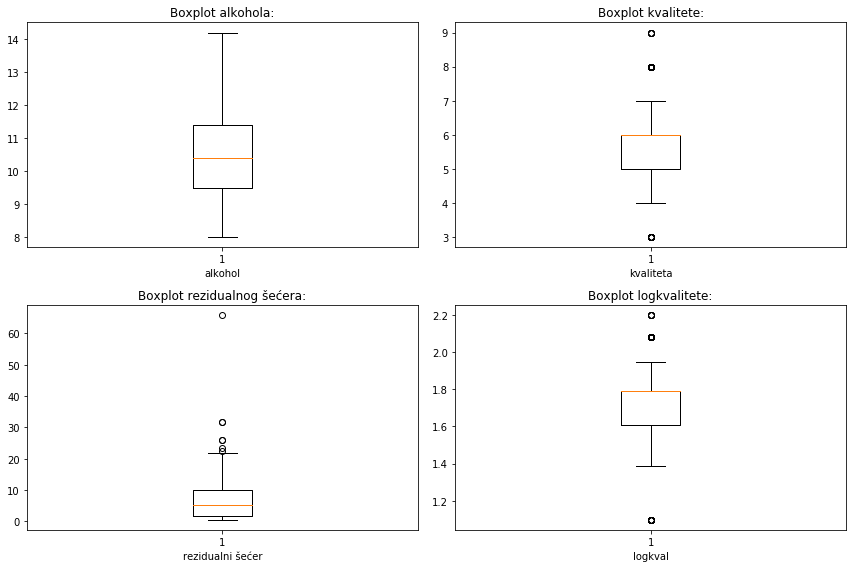

In [39]:
fig, axes=plt.subplots(2,2, figsize=(12,8))
axes[0,0].boxplot(alk)
axes[0,0].set_xlabel('alkohol')
axes[0,0].set_title(r'Boxplot alkohola:');
axes[0,1].boxplot(kval)
axes[0,1].set_xlabel('kvaliteta')
axes[0,1].set_title(r'Boxplot kvalitete:');
axes[1,0].boxplot(sugar)
axes[1,0].set_xlabel('rezidualni šećer')
axes[1,0].set_title(r'Boxplot rezidualnog šećera:');
axes[1,1].boxplot(logkval)
axes[1,1].set_xlabel('logkval');
axes[1,1].set_title(r'Boxplot logkvalitete:');
fig.tight_layout();

**Normalni vjerojatnosni graf**

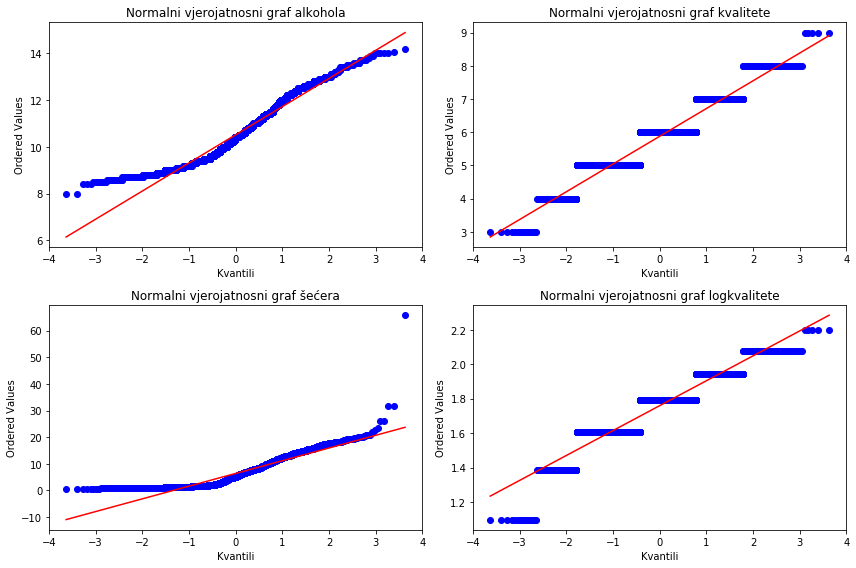

In [40]:
fig, ax=plt.subplots(2,2, figsize=(12,8))
y=sc.stats.probplot(alk, plot=ax[0,0])
y=sc.stats.probplot(kval, plot=ax[0,1])
y=sc.stats.probplot(sugar, plot=ax[1,0])
y=sc.stats.probplot(logkval, plot=ax[1,1])
ax[0,0].set_xlabel('Kvantili')
ax[0,0].set_title('Normalni vjerojatnosni graf alkohola');
ax[0,1].set_xlabel('Kvantili')
ax[0,1].set_title('Normalni vjerojatnosni graf kvalitete');
ax[1,0].set_xlabel('Kvantili')
ax[1,0].set_title('Normalni vjerojatnosni graf šećera');
ax[1,1].set_xlabel('Kvantili')
ax[1,1].set_title('Normalni vjerojatnosni graf logkvalitete');

fig.tight_layout();

Ni ovdje se ne da naslutiti normalnost bilo kojeg od uzoraka.
Koristimo test normalnosti i **Shapiro test** da provjerimo svoje slutnje. U oba slučaja, na razini značajnosti $\alpha=0.05$ testiramo hipoteze:
\begin{equation*}
\begin{aligned}
&H_0: \, X \sim N(\mu, \sigma^2) \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}

In [41]:
def normalnost (x):
    k,pv = stats.normaltest(x)
    return np.array(pv)

def Shapiro(x):
    t, pv = sc.stats.shapiro(x)
    return np.array(pv)
   
    
ispis={ '': pd.Series(np.array([ 'p-vrijednost', 'pv Shapiro testa'])),
        'alkohol': pd.Series([normalnost(alk), Shapiro(alk)]),
        'kvaliteta': pd.Series([normalnost(kval), Shapiro(kval)]),
        'rezidualni šećer': pd.Series([normalnost(sugar), Shapiro(sugar)]),
        'logkvalitete': pd.Series([normalnost(logkval), Shapiro(logkval)])
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,alkohol,kvaliteta,logkvalitete,rezidualni šećer
,,,,
p-vrijednost,3.6093322661785705e-94,9.742292312580693e-07,4.542066109774456e-47,1.3781731594418583e-228
pv Shapiro testa,2.5701792244941017e-36,0.0,0.0,0.0


 Za sve p-vrijednosti vrijedi $p<\alpha$, pa na razini značajnosti od $\alpha=0.05$ za sve uzorke odbacujemo $H_0$ u korist $H_1$, čime potvrđujemo slutnje iz grafa.

**KORELACIJA**
Uobičajeno je koristiti **Pearsonov koeficijent korelacije**, međutim ovdje nemamo ispunjenu pretpostavku o normalnosti uzorka. Željeli bismo koristiti **Spearmanov koeficijent korelacije**.

Spearmanov koeficijent za alkohol i kvalitetu:
0.44036918162468297
p-vrijednost: 1.6591955335864813e-231
Spearmanov koeficijent za šećer i kvalitetu:
-0.08206978991126884
p-vrijednost: 8.82191095789051e-09


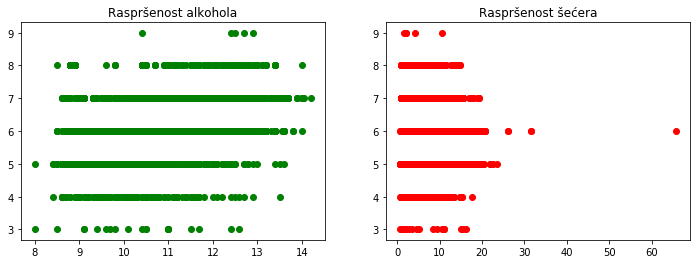

In [42]:
koef1, pv1 = sc.stats.spearmanr(alk, kval)
koef2, pv2 = sc.stats.spearmanr(sugar, kval)
def izlaz (what):
    text = "Spearmanov koeficijent za "+ what + " i kvalitetu:"
    print (text)
    
izlaz ("alkohol")
print (koef1)
print ("p-vrijednost:",pv1)
izlaz ("šećer")
print(koef2)
print("p-vrijednost:",pv2)

fig, axes=plt.subplots(1,2, figsize=(12,4))
axes[0].scatter(alk, kval, c='green')
axes[1].scatter(sugar, kval, c='red')
axes[0].set_title(u'Raspršenost alkohola')
axes[1].set_title(u'Raspršenost šećera')
axes[1].axis('tight')
axes[0].axis('tight');

Iz gore vidljivih *scatterplotova*, vidi se da ne postoji monotona funkcija koja povezuje dane uzorke, dakle ni **Spearmanov koeficijent** nam ništa ne govori. Preostaje iskoristiti neparametarski test, kao npr. **Kendallov tau test**.

**Kendallov koeficijent korelacije** $\tau$ određuje jačinu veze dvaju diskretnih statističkih obilježja u odnosu na rangove njihove vrijednosti. Kendallov koeficijent korelacije dobijemo tako da najprije vrijednostima obilježja $X$ i $Y$ dodijelimo rangove. Zatim promatramo parove rangova u uzorku za dvodimenzionalno obilježje $(X,Y)$. Označimo sa $I$ broj inverzija među tim parovima, te neka je $J$ broj onih parova koji nisu u inverziji. Tada je Kendalllov koeficijent korelacije jednak
$$\tau=\frac{I-J}{I+J}$$

In [43]:
data.corr(method='kendall')


,alcohol,sugar,quality
alcohol,1.000000,-0.305601,0.346672
sugar,-0.305601,1.000000,-0.063087
quality,0.346672,-0.063087,1.000000


Ovdje vidimo da je korelacija između rezidualnog šećera i alkohola $\tau=-0.305601$, dok je između kvalitete i alkohola $\tau=0.346672$, a najzanimljivije između rezidualnog šećera i kvalitete je $\tau=-0.063087$.

Izračunajmo još i kovarijacijsku matricu.

In [44]:
data.cov()

,alcohol,sugar,quality
alcohol,1.514427,-2.812740,0.474726
sugar,-2.812740,25.725770,-0.438316
quality,0.474726,-0.438316,0.784356


**Linearna regresija**

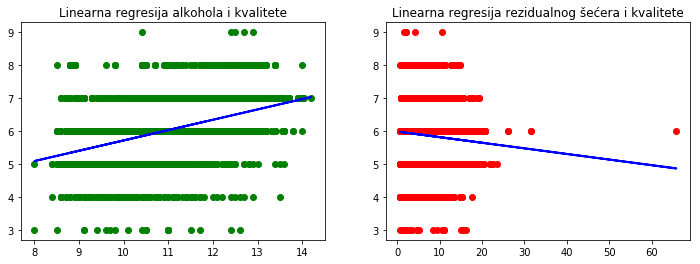

In [45]:
slope1, intercept1, r1, pv1, std_err1 = sc.stats.linregress(alk, kval)
slope2, intercept2, r2, pv2, std_err2 = sc.stats.linregress(sugar, kval)

fig, axes=plt.subplots(1,2, figsize=(12,4))
axes[0].plot(alk, kval, 'o', c='green')
axes[0].plot(alk, slope1*alk+intercept1, lw=2, c='blue' )
axes[0].set_title('Linearna regresija alkohola i kvalitete')
axes[1].plot(sugar, kval, 'o', c='red')
axes[1].plot(sugar, slope2*sugar+intercept2, lw=2, c='blue' )
axes[1].set_title('Linearna regresija rezidualnog šećera i kvalitete')
axes[1].axis('tight')
axes[0].axis('tight');

Iz grafova se vidi da nema smisla provoditi linearnu regresiju za naše podatke.

**ZAKLJUČAK**
Nakon analize podataka o vinima, zaključujemo da podaci o postotku alkohola u vinu, o rezidualnim šećerima i o kvaliteti vina **nisu** normalno distribuirani.
Postoji slaba negativna korelacija između rezidualnog šećera i postotka alkohola, pa su ti podaci u slaboj zavisnosti. Također, postoji slaba korelacija između postotka alkohola i kvalitete vina i ona je pozitivna. Međutim, između rezidualnog šećera i kvalitete vina je vrlo mali koeficijent korelacije.
Vidi se, dakle, da rezidualni šećer nema gotovo nikakvog utjecaja na kvalitetu nekog vina, ali u slaboj je ovisnosti sa postotkom alkohola.
Da je malo jača korelacija između postotka alkohola i kvalitete vina, mogli bismo reći:
"Što više alkohola, to bolje vino!", međutim, ovako ćemo ustvrditi da se i stručnjaci slažu da u tome ima **nešto** istine, ali nije samo to tajna dobrog vina.
